<a href="https://colab.research.google.com/github/KevinKuslin/MachineLearning2025/blob/main/Kel5_ML_CalorieTracking_PPTI21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cek GPU Tesla T4 milik Colab

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Import Library

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

# Import dari Lokal ke Colab

In [27]:
from google.colab import files
uploadVar = list(files.upload().keys())[0]
df = pd.read_csv(uploadVar)
df.head()

Saving calories.csv to calories (1).csv


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Jumlah Data dan Data Type Dataset

In [3]:
print(df.shape) # df.tuple bentuknya tuple
df.info()

(15000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


# Deskripsi Dataset

In [ ]:
df.describe()

# Exploratory Data Analysis: Scatterplot Height vs Weight

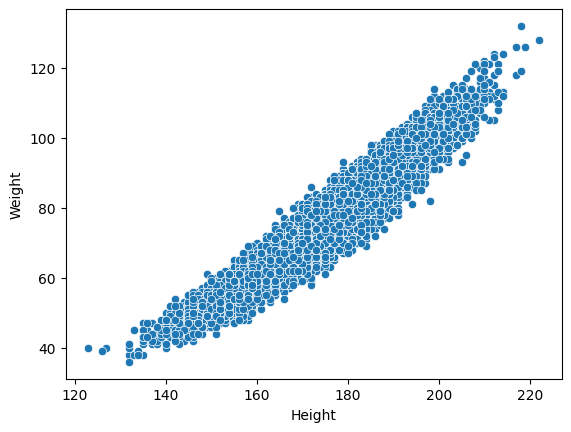

In [ ]:
sb.scatterplot(x='Height', y='Weight', data=df)
plt.show()

# Exploratory Data Analysis: (Age, Height, Weight, Duration) vs Calories

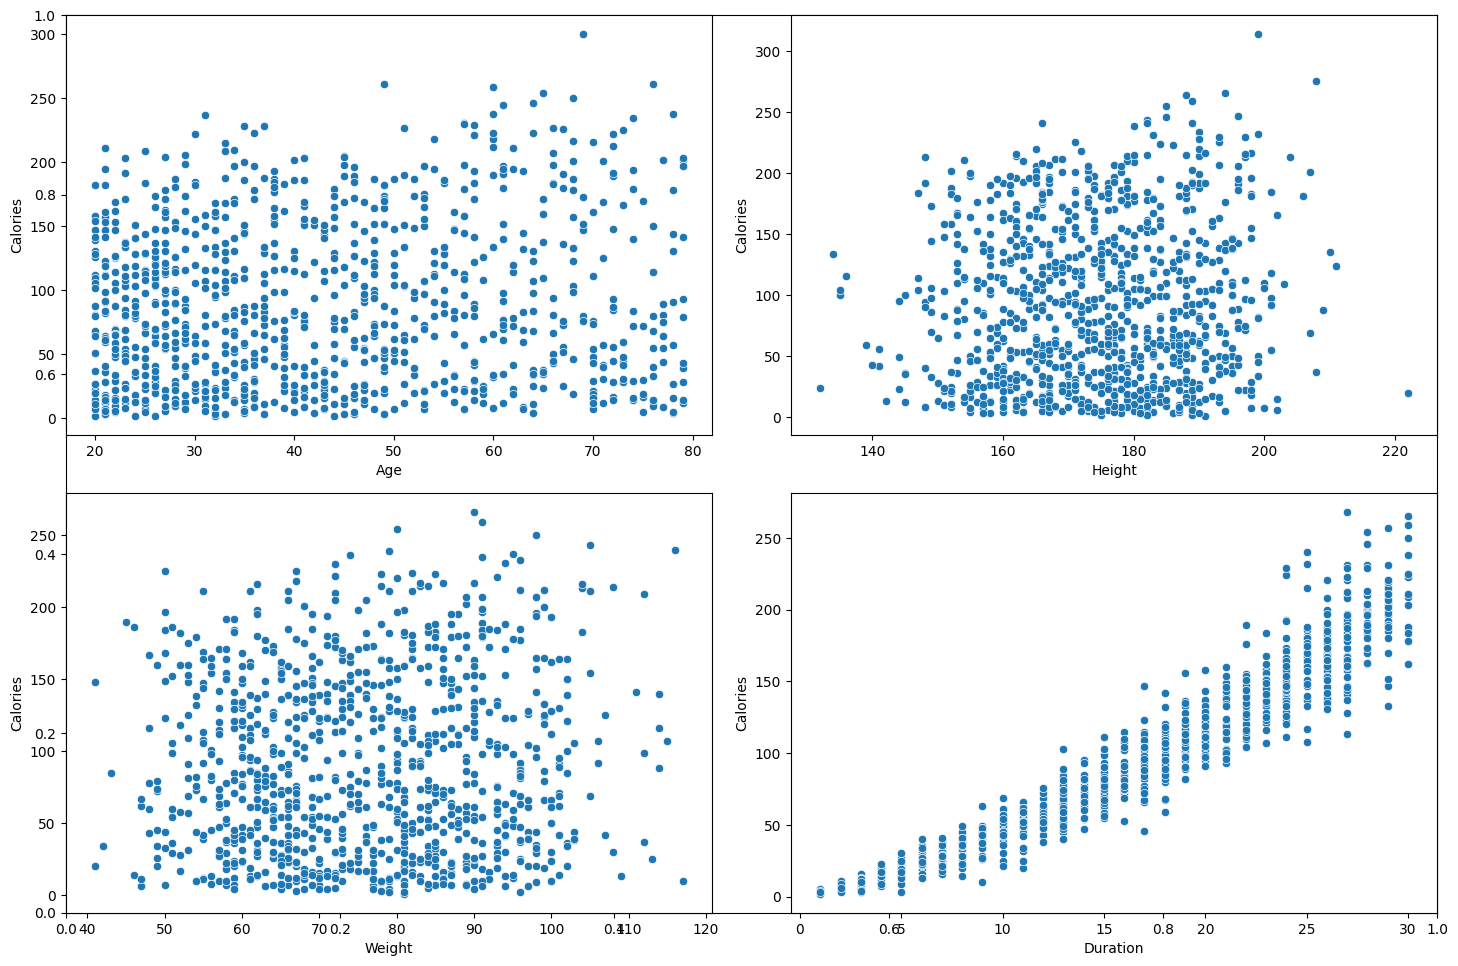

In [4]:
features = ['Age', 'Height', 'Weight', 'Duration']
target = 'Calories'
plt.subplots(figsize=(15, 10))

for i, col in enumerate(features):
  plt.subplot(2, 2, i+1)
  x = df.sample(1000)
  sb.scatterplot(x=col, y=target, data=x)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis: Distribution Plot dari Semua Fitur

/tmp/ipython-input-1308067805.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/tmp/ipython-input-1308067805.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/tmp/ipython-input-1308067805.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seabor

ValueError: num must be an integer with 1 <= num <= 6, not 7

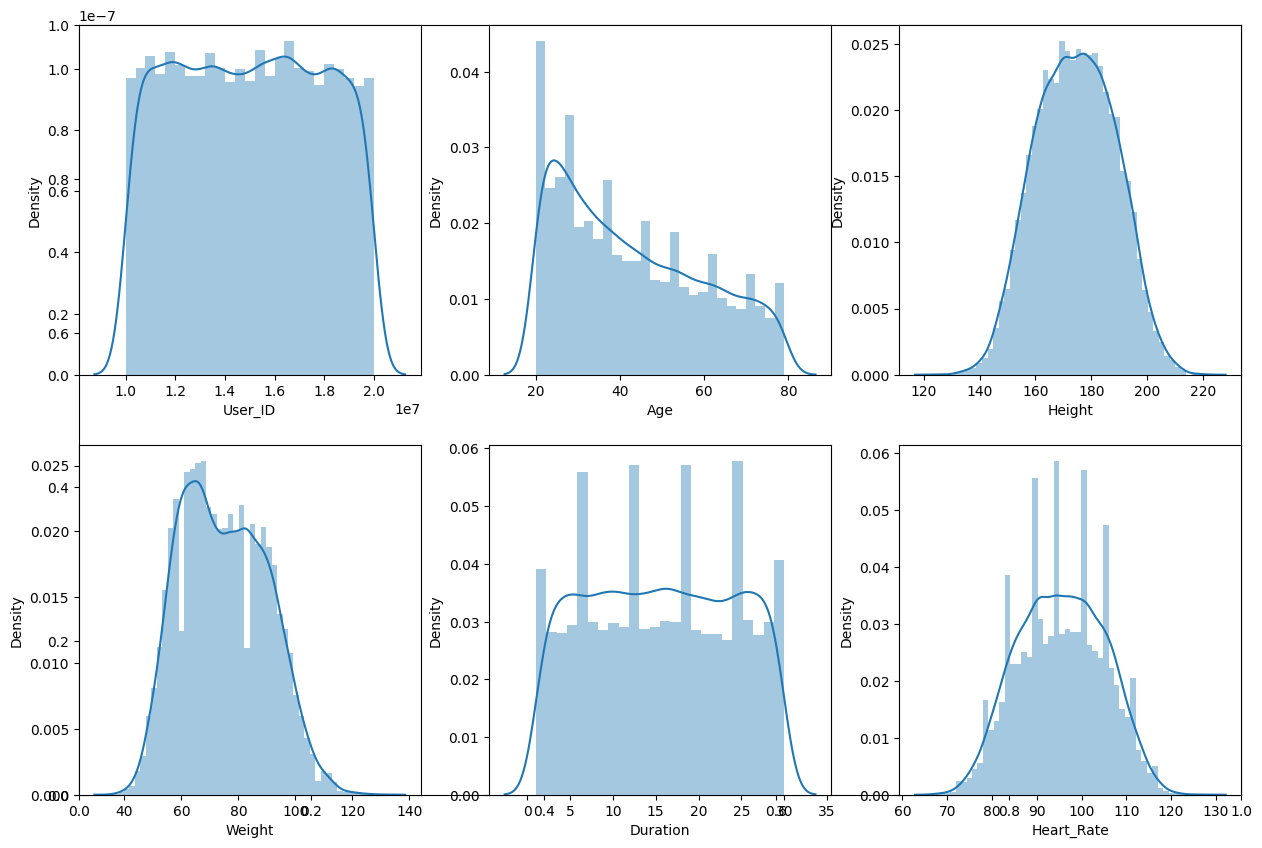

In [28]:
features = df.select_dtypes(include=['int64', 'float64']).columns

plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
  plt.subplot(2, 3, i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

# Exploratory Data Analysis: Numerisasi Fitur 'Gender'

In [29]:
df.replace({'male': 0, 'female': 1}, inplace=True)
df.head()

/tmp/ipython-input-1584836347.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'male': 0, 'female': 1}, inplace=True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Hapus Data User_ID

In [30]:
df = df.drop(columns=['User_ID'], axis=1)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Correlation Analysis: Heat Map

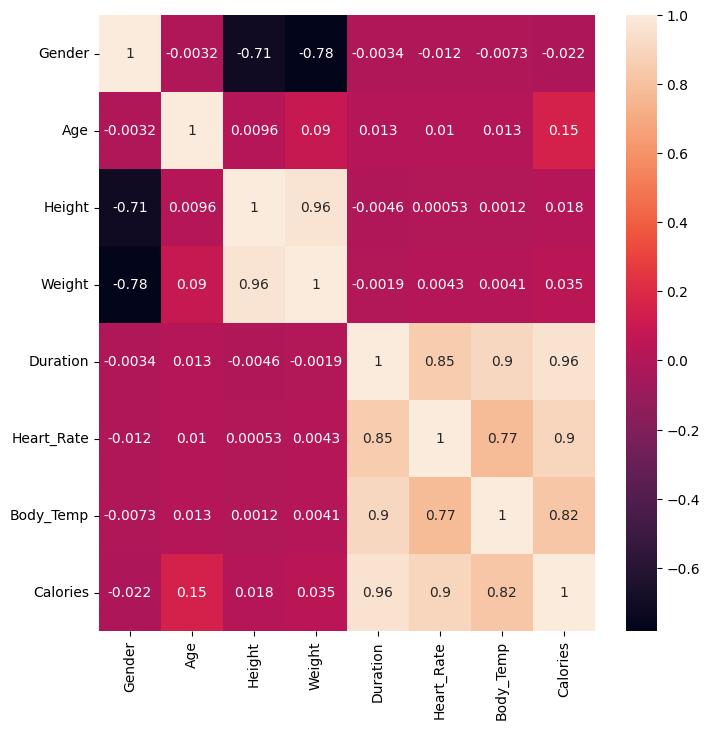

In [31]:
plt.figure(figsize=(8, 8))
df_test = df.select_dtypes(include=['int64', 'float64'])
sb.heatmap(df_test.corr(), annot=True)
plt.show()

# Hapus Data: Weight & Duration

In [32]:
df.drop('Height', axis=1, inplace=True)
df.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,94.0,29.0,105.0,40.8,231.0
1,1,20,60.0,14.0,94.0,40.3,66.0
2,0,69,79.0,5.0,88.0,38.7,26.0
3,1,34,71.0,13.0,100.0,40.5,71.0
4,1,27,58.0,10.0,81.0,39.8,35.0


# Dataset Splitting  

In [33]:
features = df.drop(['Calories'], axis=1)
target = df['Calories']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.1, random_state=22)
X_train.shape, X_val.shape

((13500, 6), (1500, 6))

# Training

In [34]:
from sklearn.metrics import mean_absolute_error as mae, r2_score
models = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
  models[i].fit(X_train, Y_train)
  print(f'{models[i]} : ')

  train_preds = models[i].predict(X_train)
  print('Training Error : ', mae(Y_train, train_preds))
  val_preds = models[i].predict(X_val)
  print('Validation R²: ', r2_score(Y_val, val_preds))
  print('Validation Error : ', mae(Y_val, val_preds))
  print()

LinearRegression() : 
Training Error :  8.359955029608056
Validation R²:  0.9653095842992109
Validation Error :  8.458478412078373

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Error :  0.956333331518703
Validation R²:  0.9990050499353027
Validation Error :  1.3541555430491765

Lass

# Inisialisasi Data Prediksi

In [35]:
predict_data = {
    'Gender': 1,
    'Age': 25,
    'Weight': 175,
    'Duration': 25,
    'Heart_Rate': 100.0,
    'Body_Temp': 37.5
}

df_predict = pd.DataFrame([predict_data])
df_predict.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp
0,1,25,175,25,100.0,37.5


# Prediksi Data

In [37]:
for model in models:
  model.fit(X_train, Y_train)
  pred = model.predict(df_predict)
  print(f"{model} Prediction: {pred[0]:.2f}")

LinearRegression() Prediction: 207.29
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) Prediction: 139.71
Lasso() Prediction: 171.94
RandomForestRegressor() Prediction: 129.80
Ridge() Prediction: 207.25
